## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import graphviz
import dtreeviz


# boston = datasets.load_boston()
# X = pd.DataFrame(boston.data, columns = boston.feature_names)
# y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [3]:
URL = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(URL)

x = df.drop(columns = ['medv']).copy()
y = df[['medv']]

In [4]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2402)

dt_reg = DecisionTreeRegressor(max_depth=8, random_state=2402)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2402)

In [31]:
print('MSE:', 
      round(mean_squared_error(y_true=y_train, 
                               y_pred=dt_reg.predict(x_train)), 
            2))

print('R-quadrado:', 
      round(dt_reg.score(X=x_train, 
                         y=y_train), 
            2))

MSE: 1.84
R-quadrado: 0.98


In [13]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=dt_reg.predict(x_train), 
                             columns=['Valor predito do imóvel na base de treinamento']
                            )
               ], axis=1)

,medv,Valor predito do imóvel na base de treinamento
0,17.1,16.133333
1,13.4,13.000000
2,50.0,50.000000
3,8.5,6.910000
4,16.6,16.300000
...,...,...
374,32.0,30.080000
375,17.1,17.833333
376,20.4,20.312281
377,19.4,19.033333


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [14]:
path = dt_reg.cost_complexity_pruning_path(X=x_train, y=y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.75901495e-05, 5.27704486e-05, 1.58311346e-04,
        3.29815303e-04, 3.29815303e-04, 3.29815303e-04, 6.46437995e-04,
        6.46437995e-04, 6.46437995e-04, 6.46437995e-04, 1.31926121e-03,
        1.59630607e-03, 2.53298153e-03, 3.03957784e-03, 3.20580475e-03,
        3.49076517e-03, 4.45250660e-03, 4.45910290e-03, 4.78891821e-03,
        5.08355321e-03, 7.39665787e-03, 8.90501319e-03, 1.02585752e-02,
        1.07504083e-02, 1.26649077e-02, 1.28232190e-02, 1.35092348e-02,
        1.40606860e-02, 1.61609499e-02, 1.71451187e-02, 1.77319701e-02,
        1.82080035e-02, 1.87475814e-02, 1.90501319e-02, 2.16789798e-02,
        2.22348285e-02, 2.24813419e-02, 2.34879667e-02, 2.40809147e-02,
        2.43931398e-02, 2.54177661e-02, 2.55408971e-02, 3.01011434e-02,
        3.10691571e-02, 3.26609406e-02, 3.40545295e-02, 3.46226913e-02,
        3.83786280e-02, 4.08654354e-02, 4.27905033e-02, 4.31002639e-02,
        5.29979704e-02, 5.74670185e-02, 6.54718896

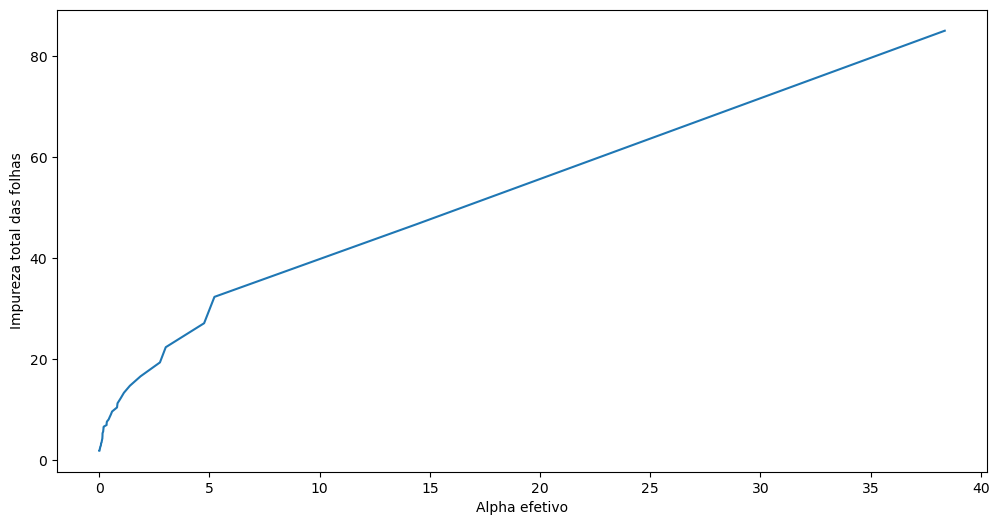

In [33]:
ccp_alphas, impureza = path.ccp_alphas, path.impurities

plt.figure(figsize=(12,6))
plt.plot(ccp_alphas, impureza)

plt.xlabel(xlabel='Alpha efetivo')
plt.ylabel(ylabel='Impureza total das folhas')

plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [17]:
cls = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=2402)
    clf.fit(x_train, y_train)
    cls.append(clf)

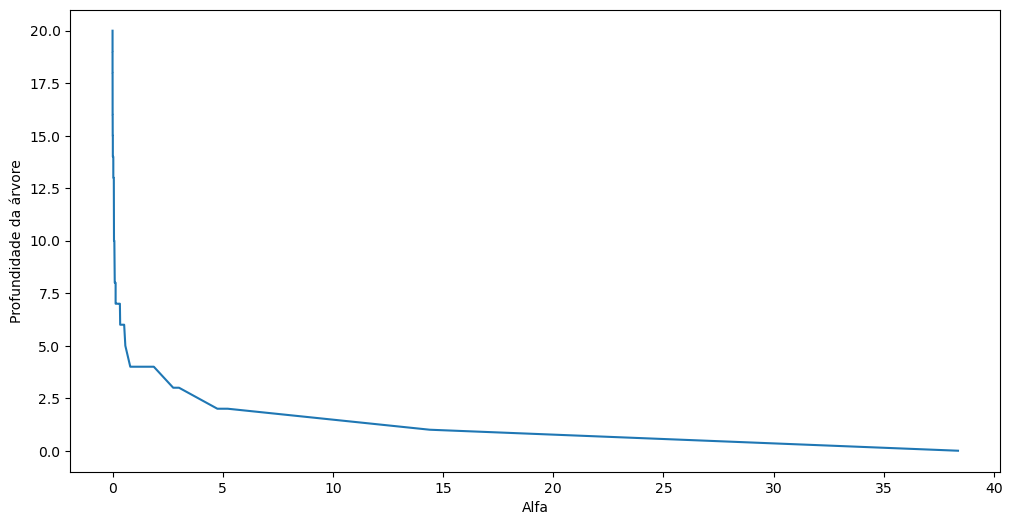

In [34]:
tree_depths = [clf.tree_.max_depth for clf in cls]

plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, tree_depths)

plt.xlabel(xlabel='Alfa')
plt.ylabel(ylabel='Profundidade da árvore')

plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [35]:

train_scores = [mean_squared_error(y_true=y_train, 
                                   y_pred=clf.predict(x_train)) for clf in cls]

test_scores  = [mean_squared_error(y_true=y_test, 
                                   y_pred=clf.predict(x_test)) for clf in cls]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

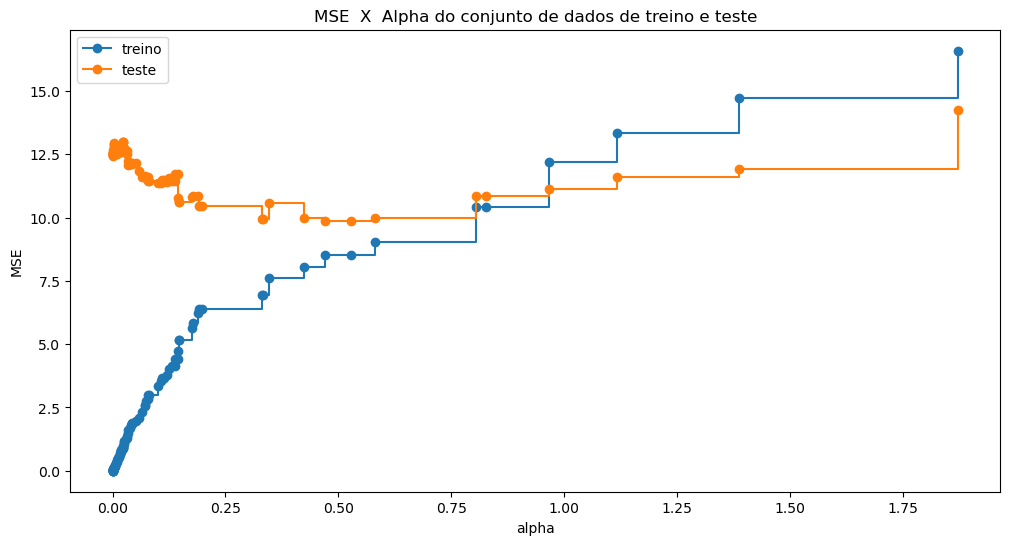

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel(xlabel='alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label='MSE  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas[:-6], train_scores[:-6], 
        marker='o', label='treino', drawstyle='steps-post')

ax.plot(ccp_alphas[:-6], test_scores[:-6], 
        marker='o', label='teste', drawstyle='steps-post')

ax.legend()

plt.show()

In [37]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                            'train_scores':train_scores, 
                            'test_scores':test_scores})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
83,0.470678,8.505649,9.879355
84,0.526980,8.505649,9.879355
79,0.331035,6.932333,9.960400
80,0.333092,6.932333,9.960400
85,0.580095,9.032629,9.983678
...,...,...,...
92,2.752012,19.340563,17.403841
94,4.756473,27.112783,21.696716
95,5.225189,27.112783,21.696716
96,14.393285,46.731257,44.681016


In [38]:
ccp_alpha_min = df_ccp.sort_values(by=['test_scores', 'train_scores']).iloc[0,0]
ccp_alpha_min

0.47067763129040174

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [39]:
final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=2402)
final_tree.fit(x_train, y_train)

print(f'Profundidade: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de testes: {final_tree.score(x_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(x_test)):.2f}')

Profundidade: 6
R-quadrado na base de testes: 0.88
MSE na base de testes: 9.88


### 7. Visualize esta árvore.

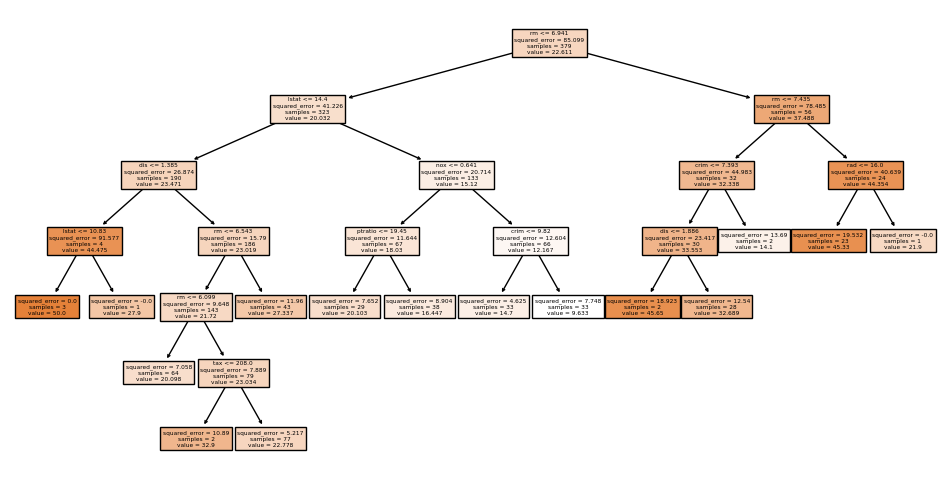

In [40]:
plt.rc('figure', figsize=(12,6))

tree.plot_tree(decision_tree=final_tree, 
               feature_names=x.columns, 
               filled=True);